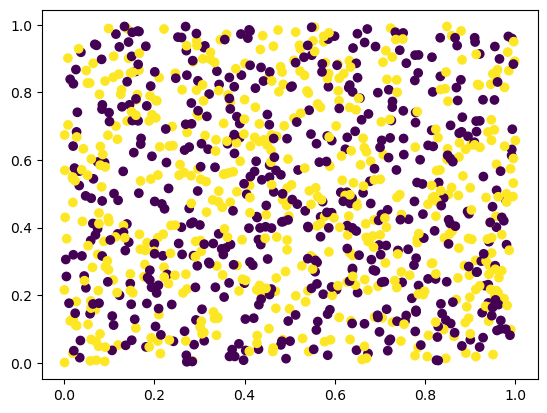

(800, 100)


AttributeError: 'LinearSVC' object has no attribute 'support_vectors_'

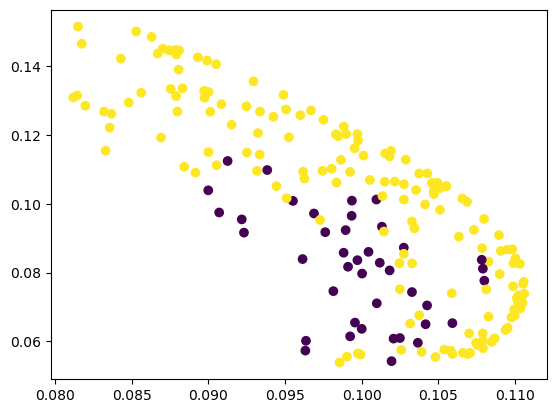

In [14]:
#SVM
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split

def correlation(a,b):
    a = np.array(a)
    b = np.array(b)
    return a @ b / np.sqrt(a @ a * b @ b)

num_samples = 1000
X = np.random.rand(num_samples, 2)
y = np.random.randint(0, 2, num_samples)
#plot
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#using Nyström method
from sklearn.kernel_approximation import Nystroem
feature_map_nystroem = Nystroem(gamma=.2, random_state=1, n_components=100)
X_train = feature_map_nystroem.fit_transform(X_train)
X_test = feature_map_nystroem.transform(X_test)
print(X_train.shape)
#using linear kernel
clf = svm.LinearSVC()
clf.fit(X_train, y_train)

#predict

y_pred = clf.predict(X_test)
#plot
plt.scatter(X_test[:,0], X_test[:,1], c=y_pred)
#plot support vectors
plt.scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1], c='red')

plt.show()


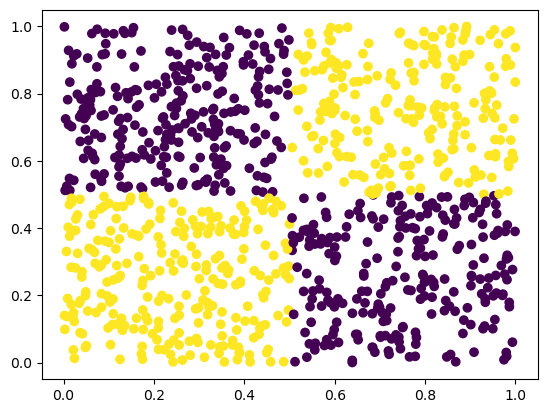

Epoch: 0, Loss: 2677.6377
Epoch: 100, Loss: 1428.2032


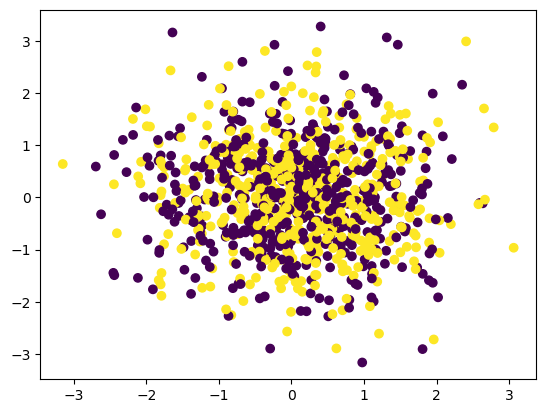

In [7]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#VAE model
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable

#VAE model
class VAE(nn.Module):
    def __init__(self, input_dim, hidden_dim, latent_dim):
        super(VAE, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc21 = nn.Linear(hidden_dim, latent_dim)
        self.fc22 = nn.Linear(hidden_dim, latent_dim)
        self.fc3 = nn.Linear(latent_dim, hidden_dim)
        self.fc4 = nn.Linear(hidden_dim, input_dim)
    
    def encode(self, x):
        h = F.relu(self.fc1(x))
        return self.fc21(h), self.fc22(h)
    
    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5*logvar) #logvar = log(sigma^2)
        eps = torch.randn_like(std)
        return mu + eps*std
    
    def decode(self, z):
        h = F.relu(self.fc3(z))
        return torch.sigmoid(self.fc4(h))
    
    def forward(self, x):
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar)
        return self.decode(z), mu, logvar
    
    def loss_function(self, recon_x, x, mu, logvar):
        BCE = F.binary_cross_entropy(recon_x, x, reduction='sum')
        KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
        return BCE + KLD
    
    def sample(self, num_samples):
        z = torch.randn(num_samples, 20)
        return self.decode(z)
    
#generate data
def generate_data(num_samples):
    x = np.random.rand(num_samples, 2)
    y = np.zeros(num_samples)
    for i in range(num_samples):
        if x[i,0] > 0.5 and x[i,1] > 0.5:
            y[i] = 1
        elif x[i,0] < 0.5 and x[i,1] < 0.5:
            y[i] = 1
        else:
            y[i] = 0
    return x, y

#plot data
def plot_data(x, y):
    plt.scatter(x[:,0], x[:,1], c=y)
    plt.show()

#train VAE
def train_vae(x, y, num_epochs):
    #convert to torch tensor
    x = torch.from_numpy(x).float()
    y = torch.from_numpy(y).float()
    
    #train VAE
    vae = VAE(2, 20, 20)
    optimizer = optim.Adam(vae.parameters(), lr=1e-3)
    for epoch in range(num_epochs):
        recon_x, mu, logvar = vae(x)
        loss = vae.loss_function(recon_x, x, mu, logvar)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if epoch % 100 == 0:
            print('Epoch: {}, Loss: {:.4f}'.format(epoch, loss.item()))
    return vae

#plot latent space
def plot_latent_space(vae, x, y):
    x = torch.from_numpy(x).float()
    y = torch.from_numpy(y).float()
    mu, logvar = vae.encode(x)
    z = vae.reparameterize(mu, logvar)
    z = z.detach().numpy()
    plt.scatter(z[:,0], z[:,1], c=y)
    plt.show()

x, y = generate_data(1000)
plot_data(x, y)
vae = train_vae(x, y, 200)
plot_latent_space(vae, x, y)


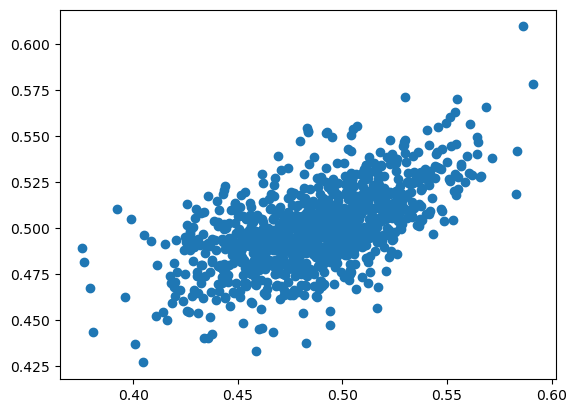

In [9]:
z = vae.sample(1000)
z = z.detach().numpy()
plt.scatter(z[:,0], z[:,1])

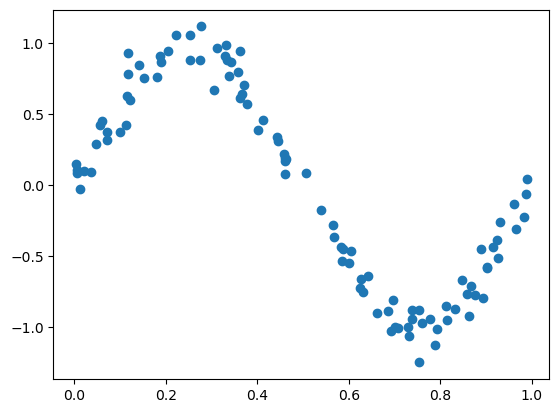

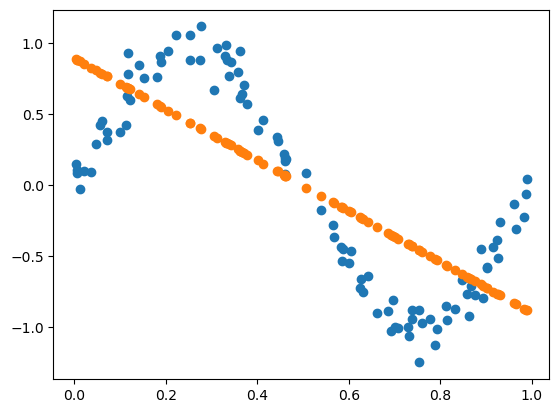

In [10]:
#SVR
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#SVR model
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

#generate data
def generate_data(num_samples):
    x = np.random.rand(num_samples, 1)
    y = np.zeros(num_samples)
    for i in range(num_samples):
        y[i] = np.sin(2*np.pi*x[i]) + np.random.normal(0, 0.1)
    return x, y

#plot data
def plot_data(x, y):
    plt.scatter(x, y)
    plt.show()

#train SVR
def train_svr(x, y, num_epochs):
    #convert to torch tensor
    x = torch.from_numpy(x).float()
    y = torch.from_numpy(y).float()
    
    #train SVR
    svr = SVR(kernel='linear', C=1)
    svr.fit(x, y)
    return svr

#plot latent space
def plot_latent_space(svr, x, y):
    x = torch.from_numpy(x).float()
    y = torch.from_numpy(y).float()
    y_pred = svr.predict(x)
    plt.scatter(x, y)
    plt.scatter(x, y_pred)
    plt.show()

x, y = generate_data(100)
plot_data(x, y)
svr = train_svr(x, y, 100)
plot_latent_space(svr, x, y)

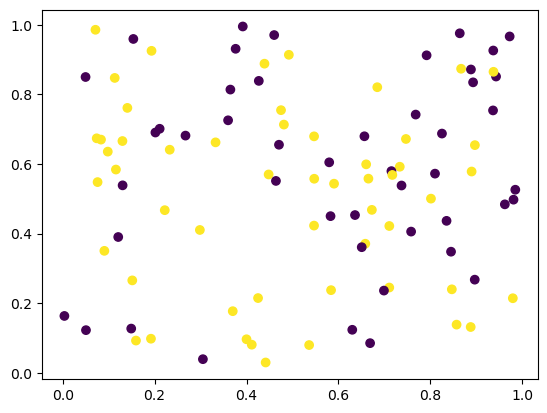

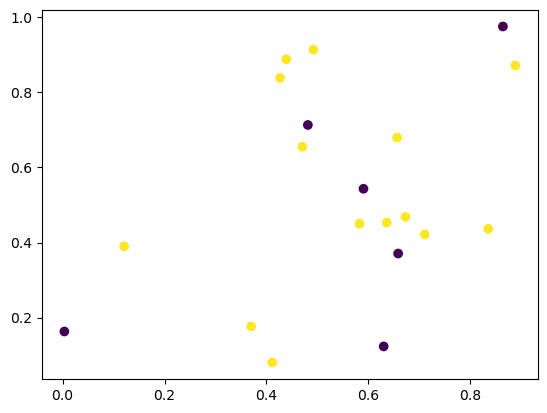

In [11]:
#Ada Boosting
X = np.random.rand(100,2)
y = np.random.randint(0,2,100)
#plot
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=100)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
#plot
plt.scatter(X_test[:,0], X_test[:,1], c=y_pred)
plt.show()
